In [3]:
import numpy as np
import scipy.signal as ss
from PIL import Image as Img
import matplotlib.pyplot as plt
import cv2
import math

In [89]:
def hough(img):
    row, col = np.shape(img)[0], np.shape(img)[1]
    diagonal = int(np.ceil(np.sqrt(pow(row, 2)+pow(col, 2))))
    accum = np.zeros((2*diagonal,180), dtype='uint8')
    prow, pcol = np.nonzero(img)
    for i in range(len(prow)):
        r = prow[i]
        c = pcol[i]
        for j in range(-90, 90):
            rho = int(c*np.cos(np.radians(j)) + r*np.sin(np.radians(j))+diagonal)
            accum[rho][j+90] += 1
    return accum
    
def thres(accum):
    threshold = 0.75*np.max(accum)
    ps = np.transpose(np.nonzero(accum>threshold))
    ps[:,0] = ps[:,0] - len(accum)/2
    ps[:,1] = 90 - ps[:,1]
    ret = []
    for p in ps:
        x,y = p[0], p[1]
        row = int(x/np.cos(np.radians(y)))
        col = int(x/np.sin(np.radians(y)))
        ret.append([[10*row, -9*row],[9*col, -10*col]])
    return ret

In [90]:
img = np.zeros((11,11), dtype='uint8')
img[0][0] = 1
img[0][-1] = 1
img[-1][0] = 1
img[-1][-1] = 1
img[5][5] = 1
accum = hough(img)
accumt = thres(accum)

Text(0.5, 1.0, 'original')

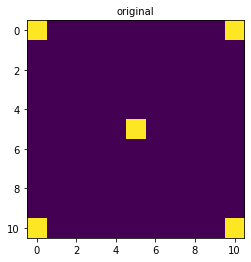

In [91]:
row, col = np.shape(img)[0], np.shape(img)[1]
diagonal = int(np.ceil(np.sqrt(pow(row, 2)+pow(col, 2))))
lines = np.linspace(-diagonal, diagonal, int(2*diagonal))
degrees = np.radians(np.arange(-90, 90))
plt.imshow(img)
plt.title('original', fontsize=10)

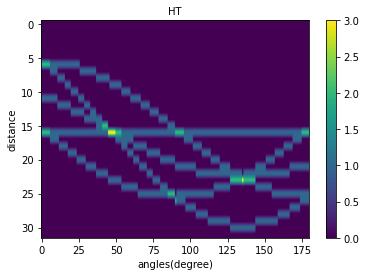

In [92]:
plt.imshow(accum, aspect='auto')
plt.title('HT', fontsize=10)
plt.xlabel("angles(degree)")
plt.ylabel("distance")
plt.colorbar()

Text(0.5, 1.0, 'Lines')

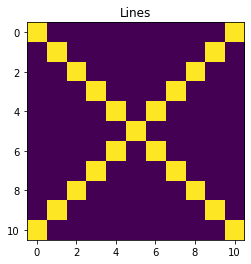

In [95]:
plt.imshow(accumt)
plt.title('Lines')

Text(0.5, 1.0, 'original')

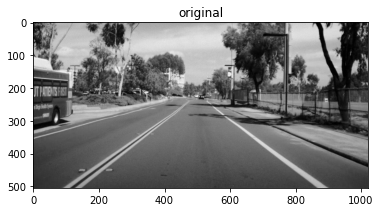

In [133]:
im = cv2.imread('lane.png')
plt.imshow(im)
plt.title("original")

Text(0.5, 1.0, 'edges')

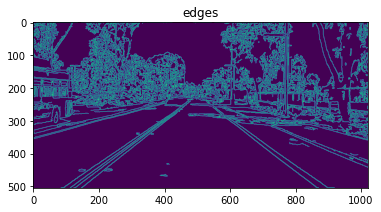

In [134]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(gray, 50, 150)
plt.imshow(edges)
plt.title("edges")

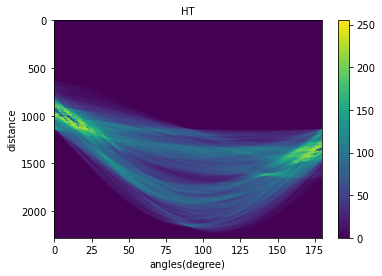

In [140]:
accum = hough(edges)
plt.imshow(accum, aspect='auto')
plt.title('HT', fontsize=10)
plt.xlabel("angles(degree)")
plt.ylabel("distance")
plt.colorbar()

Text(0.5, 1.0, 'lines')

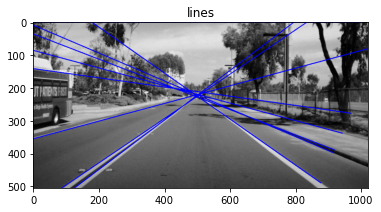

In [149]:
plt.imshow(im)
plt.title("lines")

In [143]:
def thresangle(accum):
    threshold = 0.75*np.max(accum)
    ps = np.transpose(np.nonzero(accum>threshold))
    ps[:,0] = ps[:,0] - len(accum)/2
    ps[:,1] = 90 - ps[:,1]
    ret = []
    for p in ps:
        x,y = p[0], p[1]
        row = int(x/np.cos(np.radians(y)))
        col = int(x/np.sin(np.radians(y)))
        if 25<=y<=137:
            ret.append([[10*row, -9*row],[9*col, -10*col]])
    return ret

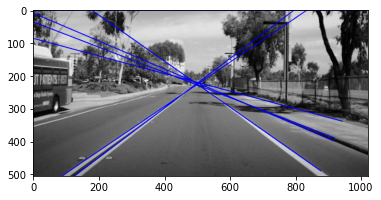

In [157]:
accumt1 = thresangle(accum)
plt.imshow(im)
for a in accumt1:
    plt.plot(a[0], a[1])